In [65]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns




In [66]:
# Load the data from a CSV file
#data = pd.read_csv('aksansh.csv')
data = pd.read_csv('FSW_Dataset_v4_test.csv')
# Assuming the target variable is named 'target' and the input features are in columns 'feature1', 'feature2', etc.

# Extract the target variable and input features
y = data['Ultimate Tensile Trength (MPa)']
X = data.drop('Ultimate Tensile Trength (MPa)', axis=1)



In [67]:
data.head()

,Tool Rotational Speed (RPM),Translational Speed (mm/min),Axial Force (KN),Ultimate Tensile Trength (MPa)
0,1400.0,42.50,6.0,77.83
1,1250.0,48.75,6.0,82.50
2,1250.0,36.25,6.0,99.16
3,1250.0,48.75,6.0,102.16
4,1100.0,42.50,6.0,103.30


In [68]:
y.head()

0     77.83
1     82.50
2     99.16
3    102.16
4    103.30
Name: Ultimate Tensile Trength (MPa), dtype: float64

In [69]:
X.head()

,Tool Rotational Speed (RPM),Translational Speed (mm/min),Axial Force (KN)
0,1400.0,42.50,6.0
1,1250.0,48.75,6.0
2,1250.0,36.25,6.0
3,1250.0,48.75,6.0
4,1100.0,42.50,6.0


In [42]:
X = X.rename(columns={'Tool Rotational Speed (RPM)': 'x1', 'Translational Speed (mm/min)': 'x2', 'Axial Force (KN)': 'x3'})

In [70]:
X.head()

,Tool Rotational Speed (RPM),Translational Speed (mm/min),Axial Force (KN)
0,1400.0,42.50,6.0
1,1250.0,48.75,6.0
2,1250.0,36.25,6.0
3,1250.0,48.75,6.0
4,1100.0,42.50,6.0


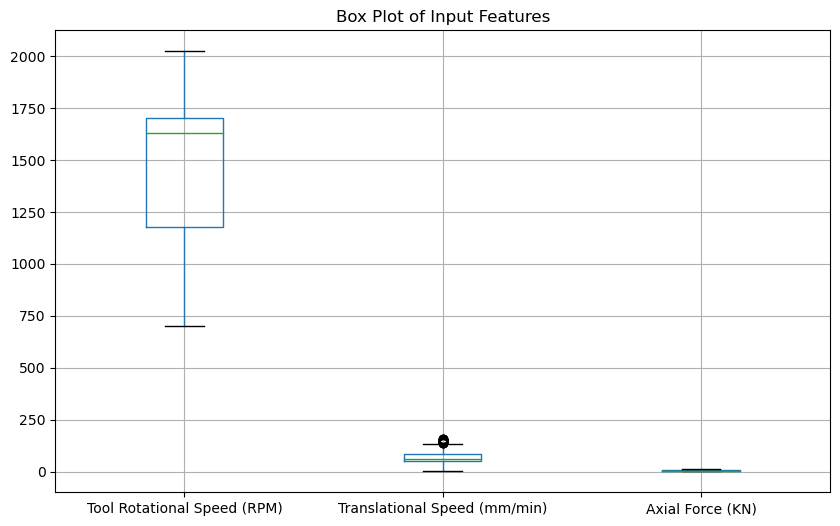

In [71]:
# Create a box plot for each feature
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
X.boxplot()

# Add a title to the plot
plt.title('Box Plot of Input Features')

# Show the plot
plt.show()




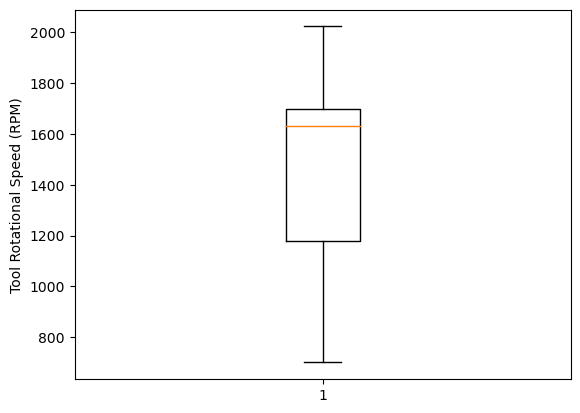

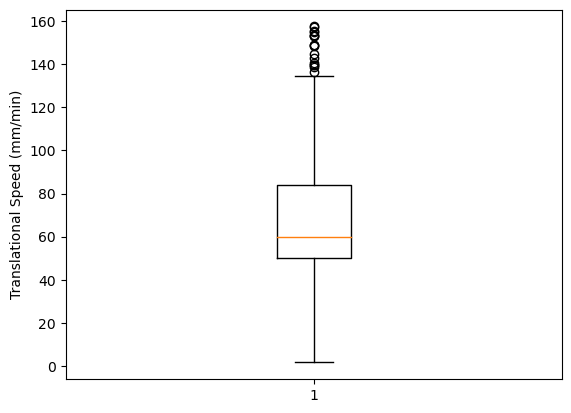

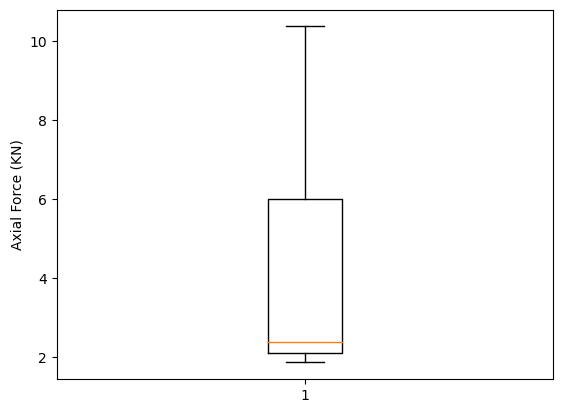

<Figure size 640x480 with 0 Axes>

In [81]:
# Find outlier indices for each feature
outlier_indices = []
outlier_values = []
k=1
for feature in X.columns:
    # Get the values for the current feature
    feature_values = X[feature].values
    
    # Create a box plot for the current feature
    plt.boxplot(feature_values)
    #plt.xlabel('X-axis Title')
    plt.ylabel(feature)
    plt.savefig(f'boxplot_{k}.png')
    k=k+1
    plt.show()
    # Find the outliers
    outliers = plt.boxplot(feature_values)['fliers'][0].get_data()[1]
    #print(outliers)
    # Append the outlier indices to the list
    outlier_indices.append([i for i, val in enumerate(feature_values) if val in outliers])
    outlier_values.append(outliers)
    
    # Clear the current plot
    plt.clf()

In [82]:
# Print the outlier indices for each feature
for i, feature in enumerate(X.columns):
    print(f"Outliers for {feature}: {outlier_indices[i]} [{i}] {outlier_values[i]} ")

Outliers for Tool Rotational Speed (RPM): [] [0] [] 
Outliers for Translational Speed (mm/min): [206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222] [1] [136.438489  138.5445798 139.6423798 139.812788  140.6506718 142.7567627
 144.8628536 148.6359164 148.7456964 149.0750364 153.0676582 153.2872182
 153.3969982 154.991006  155.3933091 157.389621  157.499401 ] 
Outliers for Axial Force (KN): [] [2] [] 


In [56]:
X.shape

(329, 3)

In [57]:
data.shape

(329, 4)

In [58]:

X_new = X.drop(outlier_indices[1])
print(X_new.head())
print(X_new.shape)

       x1     x2   x3
0  1400.0  42.50  6.0
1  1250.0  48.75  6.0
2  1250.0  36.25  6.0
3  1250.0  48.75  6.0
4  1100.0  42.50  6.0
(312, 3)


In [60]:
data_new = data.drop(outlier_indices[1])
data_new.head()


,Tool Rotational Speed (RPM),Translational Speed (mm/min),Axial Force (KN),Ultimate Tensile Trength (MPa)
0,1400.0,42.50,6.0,77.83
1,1250.0,48.75,6.0,82.50
2,1250.0,36.25,6.0,99.16
3,1250.0,48.75,6.0,102.16
4,1100.0,42.50,6.0,103.30


In [61]:
print(data_new.shape)

(312, 4)


In [62]:
# Save the DataFrame to a CSV file
data_new.to_csv('filtered_dataset_no_outlier.csv', index=False)

In [14]:
# Calculate the Z-scores for each feature
z_scores = zscore(X)

print(z_scores)

    Tool Rotational Speed (RPM)  Translational Speed (mm/min)  \
0                      3.387053                      0.293882   
1                     -0.567534                     -0.161673   
2                     -0.567534                     -0.161673   
3                     -1.358452                      0.977213   
4                      0.223383                      0.977213   
..                          ...                           ...   
80                     1.014300                     -1.967566   
81                     1.014300                      1.643841   
82                     1.014300                     -0.161673   
83                     1.014300                     -0.161673   
84                     1.014300                     -0.161673   

    Axial Force (KN)  
0          -3.172531  
1           0.632292  
2           0.632292  
3          -0.751280  
4          -0.751280  
..               ...  
80          0.632292  
81          0.632292  
82         -

In [ ]:
# Define a threshold for outlier detection (e.g., Z-score > 3)
threshold = 3

# Find outliers based on the Z-scores
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

# Print the indices of outliers
print("Outlier indices:", outlier_indices)